# 
<h1 style="
    background-color:#2f632a;
    color:#fff;
    padding:20px;
    border-radius:8px;
    text-align:center;
    font-family:Consolas, 'Courier New', monospace;
">
Spotify - Boosting
</h1>

<div style="background-color:#f4faf2; font-family:Consolas; padding:10px; border-radius:8px;">

| **Step to be Executed**                                          |
| ---------------------------------------------- | 
| Data Processing                        | 
| Data Split                            | 
| Model Training                             | 
| SMOTE                        | 
| Hyperparameter Tuning| 
| Evaluation of the Tuned Model |                     
| Model Performance Comparison  
| Final Model Performance Metrics  

 </div>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
1. Data Processing
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The data set spotify_clean_ABT.xlsx is loaded, previously worked on in the EDA.
</div>

In [1]:
import pandas as pd

# Read the dataset
df_final_ABT = pd.read_excel("spotify_clean_ABT.xlsx")

# Quick preview
print("File loaded successfully with shape:", df_final_ABT.shape)
df_final_ABT.sample(5)

File loaded successfully with shape: (2085, 23)


,artist_popularity,danceability,energy,key,loudness,mode,liveness,valence,tempo,artist_name_encoded,...,dance_energy_ratio,valence_energy,duration_min,instrumentalness_log,acousticness_log,speechiness_log,artist_song_count,artist_avg_popularity,decade,is_modern
617,72,0.626,0.516,8,78,1,0.142,0.769,153.653,389,...,1.213176,0.396804,3.200883,0.000000,0.336472,0.038066,1,67.000,2010,1
1548,79,0.605,0.800,5,79,0,0.121,0.836,128.074,64,...,0.756249,0.668800,3.531333,0.054678,0.144100,0.053067,8,78.125,2010,0
313,64,0.720,0.791,1,67,1,0.157,0.756,102.071,485,...,0.910239,0.597996,2.923783,0.000000,0.037681,0.116894,1,83.000,2010,0
344,83,0.722,0.738,9,78,0,0.198,0.748,198.075,495,...,0.978318,0.552024,3.078667,0.000015,0.283674,0.220741,2,76.000,2010,1
1731,85,0.327,0.588,4,82,1,0.104,0.329,161.074,528,...,0.556122,0.193452,3.934450,0.000000,0.080104,0.033048,10,60.800,2000,0


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
2. Data Split
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
In this step, the dataset is divided into two parts:

Predictors (X): All columns except popularity_class, which will be used as input features for the model.

Target variable (y): popularity_class

The distribution of y is printed to check for class imbalance (whether all popularity categories are equally represented).
</div>

In [2]:
# Define predictors (X) and target (y)
X = df_final_ABT.drop(columns=['popularity_class'])
y = df_final_ABT['popularity_class']

print("Features shape:", X.shape)
print("Target distribution:")
print(y.value_counts(normalize=True) * 100)

Features shape: (2085, 22)
Target distribution:
popularity_class
High      76.115108
Medium    22.206235
Low        1.678657
Name: proportion, dtype: float64


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The dataset is split into 80% training and 20% testing sets.
stratify=y keeps class proportions consistent, and random_state=42 ensures reproducibility.
</div>

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training size: {X_train.shape[0]}")
print(f"Testing size: {X_test.shape[0]}")

Training size: 1668
Testing size: 417


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
3. XGBoost Model Training and Evaluation
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This section builds and evaluates a XGBoost classifier. 
    
The target variable is encoded using LabelEncoder to convert categorical labels into numeric form.

The XGBoost model is defined with parameters (n_estimators=50, learning_rate=0.05, max_depth=5) to balance learning speed and accuracy.

After training, predictions are made and decoded back to original labels for clarity.

The model’s performance is assessed using accuracy, balanced accuracy, a classification report, a confusion matrix and a feature importance analysis.

</div>

Test Accuracy: 0.875
Balanced Accuracy: 0.658

Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.97      0.93       317
         Low       0.50      0.43      0.46         7
      Medium       0.87      0.57      0.69        93

    accuracy                           0.88       417
   macro avg       0.75      0.66      0.69       417
weighted avg       0.87      0.88      0.87       417



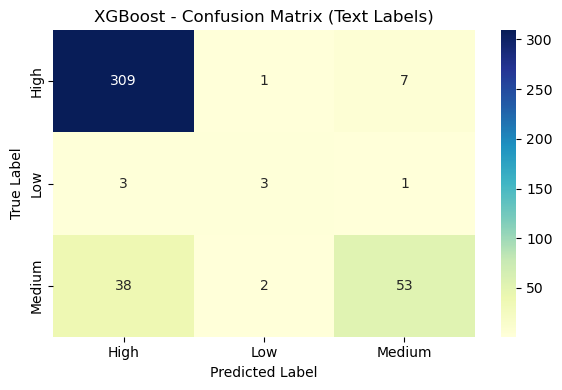

In [4]:
# --- Imports ---
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Encode Target ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# --- Define XGBoost Model ---
xgb_model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
)

# --- Train Model ---
xgb_model.fit(X_train, y_train_enc)

# --- Predictions ---
y_pred_enc = xgb_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

# --- Evaluation ---
print(f"Test Accuracy: {accuracy_score(y_test_enc, y_pred_enc):.3f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_enc, y_pred_enc):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("XGBoost - Confusion Matrix (Text Labels)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



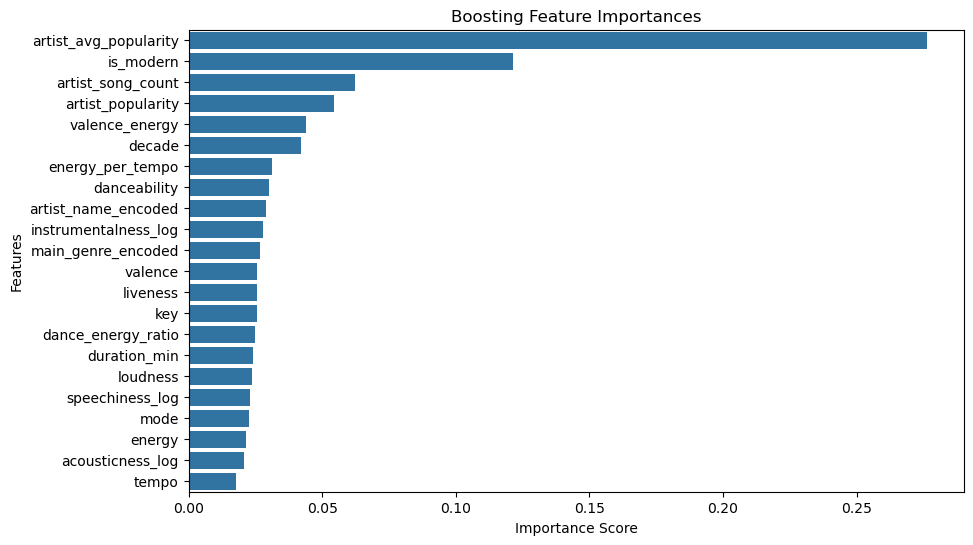

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Boosting Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
4. SMOTE (Synthetic Minority Oversampling Technique)
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This step applies SMOTE to address class imbalance in the training data.

The resulting balanced dataset ensures the model trains fairly across all classes, improving prediction performance on the underrepresented groups.
</div>

In [6]:
# --- Imports ---
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# --- Encode Target ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# --- Define Pipeline (SMOTE + XGBoost) ---
xgb_base = XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    random_state=42
)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    ('xgb', xgb_base)
])

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
5. Hyperparameter Tuning and Training
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This step performs hyperparameter optimization on the XGBoost model to achieve the best predictive performance.

. The target labels are encoded into numeric values for multiclass classification.

. A base XGBoost model is defined with a multiclass objective (multi:softmax) and evaluation metric (mlogloss).

. A parameter grid explores different settings for tree depth, learning rate, number of estimators, and sampling ratios.

. GridSearchCV tests all parameter combinations using 5-fold cross-validation and selects the configuration with the highest accuracy.

. The best model is then retrained on the full training data and used to generate predictions.

. The code records the total training time, showing the computational effort required for tuning
</div>

In [7]:
import time
start = time.time()

# --- Parameter Grid (prefix params with 'xgb__') ---
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# --- Grid Search Setup ---
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='balanced_accuracy',   # better metric for imbalanced data
    cv=5,
    n_jobs=-1,
    verbose=2
)

# --- Run Grid Search (SMOTE applied inside folds) ---
grid_search.fit(X_train, y_train_enc)

# --- Print Results ---
print("Best Parameters Found:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Balanced Accuracy: {grid_search.best_score_:.3f}")

# --- Train Final Model with Best Params ---
best_xgb = grid_search.best_estimator_

# --- Predictions ---
y_pred_train_enc = best_xgb.predict(X_train)
y_pred_train = le.inverse_transform(y_pred_train_enc)

y_pred_enc = best_xgb.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

end = time.time()
print(f"Training time: {end - start:.2f} seconds")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters Found:
{'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}
Best Cross-Validation Balanced Accuracy: 0.777
Training time: 83.29 seconds


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
6. Evaluation of the Tuned Model
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This section evaluates the tuned model using the best parameters found in Grid Search.

. Accuracy and balanced accuracy are calculated to assess performance and check for overfitting.

. Classification report summarizes precision, recall, and F1-scores for each class.

. Confusion matrix heatmap visualizes how well the tuned model distinguishes between classes.

. Feature importance Analysis to identify which features influence the model the most.
</div>


Test Accuracy for train data: 0.861
Balanced Accuracy for train data: 0.891

Test Accuracy for test data: 0.854
Balanced Accuracy for test data: 0.779

Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.89      0.91       317
         Low       0.31      0.71      0.43         7
      Medium       0.71      0.73      0.72        93

    accuracy                           0.85       417
   macro avg       0.65      0.78      0.69       417
weighted avg       0.87      0.85      0.86       417



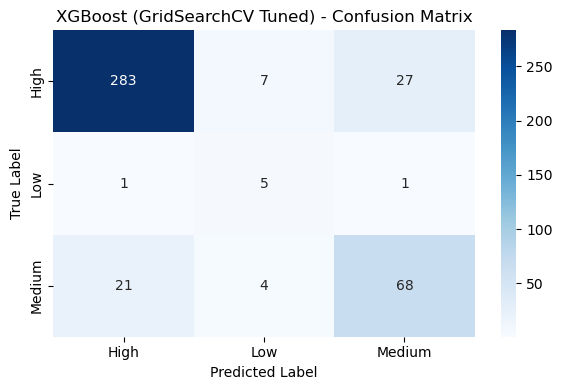

In [8]:
# --- Evaluation ---
print(f"\nTest Accuracy for train data: {accuracy_score(y_train, y_pred_train):.3f}")
print(f"Balanced Accuracy for train data: {balanced_accuracy_score(y_train, y_pred_train):.3f}")
print(f"\nTest Accuracy for test data: {accuracy_score(y_test_enc, y_pred_enc):.3f}")
print(f"Balanced Accuracy for test data: {balanced_accuracy_score(y_test_enc, y_pred_enc):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("XGBoost (GridSearchCV Tuned) - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


C:\Users\abush\AppData\Local\Temp\ipykernel_6928\2385162533.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values[:15], y=feature_importances.index[:15], palette='Blues_d')


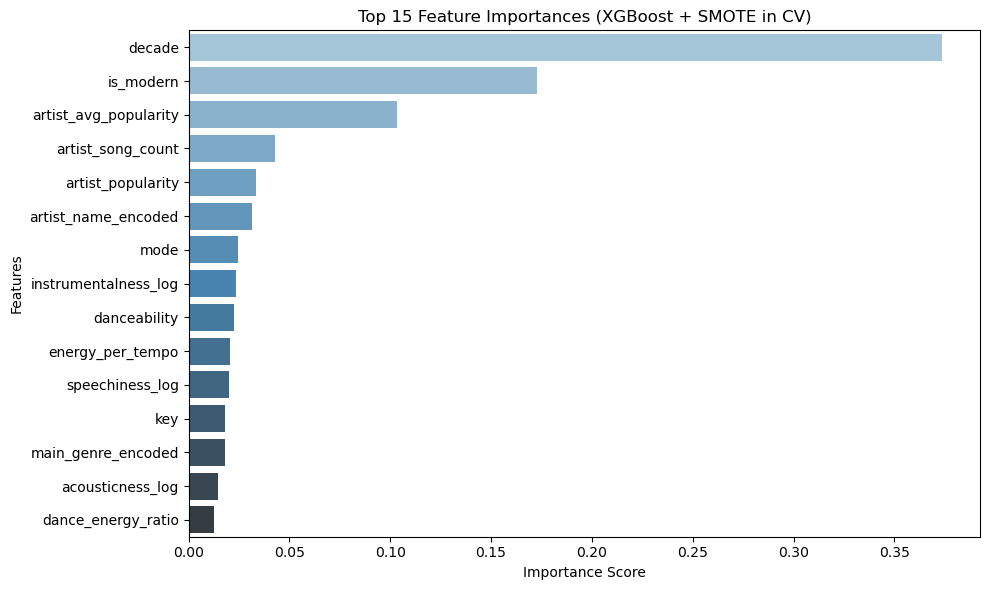

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Access the XGBoost model inside the pipeline
best_model = grid_search.best_estimator_.named_steps['xgb']

# Extract feature importances
feature_importances = pd.Series(best_model.feature_importances_, 
                                index=X_train.columns).sort_values(ascending=False)

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values[:15], y=feature_importances.index[:15], palette='Blues_d')
plt.title("Top 15 Feature Importances (XGBoost + SMOTE in CV)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
TThis step evaluates the tuned model’s ability to distinguish between classes using ROC and AUC metrics.
</div>

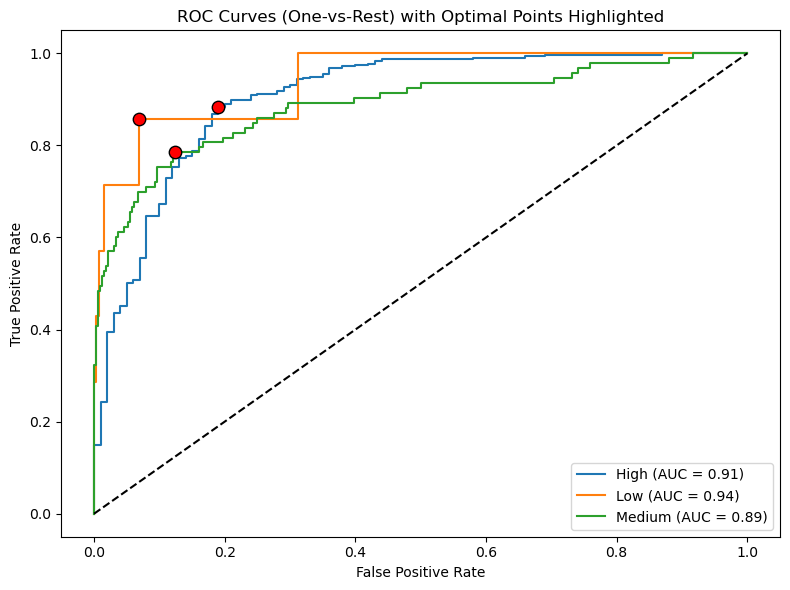

Class order: [0 1 2]
Optimal thresholds: {0: 0.5131068, 1: 0.07014116, 2: 0.41218674}


In [10]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

clf = best_model
classes_enc = clf.classes_
y_pred_proba = clf.predict_proba(X_test)

y_test_bin = label_binarize(y_test_enc, classes=classes_enc)

fpr, tpr, roc_auc, optimal_thresholds = {}, {}, {}, {}
for i, enc in enumerate(classes_enc):
    fpr[enc], tpr[enc], thr = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[enc] = auc(fpr[enc], tpr[enc])
    j_scores = tpr[enc] - fpr[enc]
    best_idx = np.argmax(j_scores)
    optimal_thresholds[enc] = thr[best_idx]

plt.figure(figsize=(8,6))
for enc in classes_enc:
    cls_txt = le.inverse_transform([enc])[0]
    plt.plot(fpr[enc], tpr[enc], label=f"{cls_txt} (AUC = {roc_auc[enc]:.2f})")
    best_idx = np.argmax(tpr[enc] - fpr[enc])
    plt.scatter(fpr[enc][best_idx], tpr[enc][best_idx],
                color='red', s=80, edgecolor='black', zorder=5)

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves (One-vs-Rest) with Optimal Points Highlighted")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

print("Class order:", classes_enc)
print("Optimal thresholds:", optimal_thresholds)

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
7. Wrap-up Model Evaluation Summary
</h2>

In [11]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report

best_xgb = grid_search.best_estimator_

y_pred_enc = best_xgb.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

acc = accuracy_score(y_test_enc, y_pred_enc)
bal_acc = balanced_accuracy_score(y_test_enc, y_pred_enc)
macro_f1 = f1_score(y_test_enc, y_pred_enc, average='macro')
weighted_f1 = f1_score(y_test_enc, y_pred_enc, average='weighted')

print(f"Accuracy: {acc:.3f}")
print(f"Balanced Accuracy: {bal_acc:.3f}")
print(f"Macro F1-score: {macro_f1:.3f}")
print(f"Weighted F1-score: {weighted_f1:.3f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.854
Balanced Accuracy: 0.779
Macro F1-score: 0.688
Weighted F1-score: 0.860

Classification report:
              precision    recall  f1-score   support

        High       0.93      0.89      0.91       317
         Low       0.31      0.71      0.43         7
      Medium       0.71      0.73      0.72        93

    accuracy                           0.85       417
   macro avg       0.65      0.78      0.69       417
weighted avg       0.87      0.85      0.86       417

